In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.stats import multivariate_normal

In [29]:
iris_df= pd.read_csv('iris.csv')
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


 check on Ex_02

In [30]:
X = iris_df[['SepalLengthCm', 'SepalWidthCm']].values
y = iris_df['Species'].values

In [31]:
X = X[(y == 'Iris-setosa') | (y == 'Iris-versicolor')]
y = y[(y == 'Iris-setosa') | (y == 'Iris-versicolor')]

In [32]:
mean_setosa = np.mean(X[y == 'Iris-setosa'], axis=0)
mean_versicolor = np.mean(X[y == 'Iris-versicolor'], axis=0)

In [33]:
cov_setosa = np.cov(X[y == 'Iris-setosa'].T)
cov_versicolor = np.cov(X[y == 'Iris-versicolor'].T)

In [34]:
A = 0.5 * (np.linalg.inv(cov_setosa) - np.linalg.inv(cov_versicolor))
B = np.dot(mean_versicolor.T, np.linalg.inv(cov_versicolor)) - np.dot(mean_setosa.T, np.linalg.inv(cov_setosa))
C = -0.5 * (np.dot(mean_versicolor.T, np.dot(np.linalg.inv(cov_versicolor), mean_versicolor)) - np.dot(mean_setosa.T, np.dot(np.linalg.inv(cov_setosa), mean_setosa))) - np.log(np.linalg.det(cov_versicolor) / np.linalg.det(cov_setosa))

In [35]:
h = .02 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


In [36]:
Z_setosa = (np.dot(np.c_[xx.ravel(), yy.ravel()], A) * np.c_[xx.ravel(), yy.ravel()]).sum(axis=1) + np.dot(B, np.c_[xx.ravel(), yy.ravel()].T) + C
Z_setosa = Z_setosa.reshape(xx.shape)

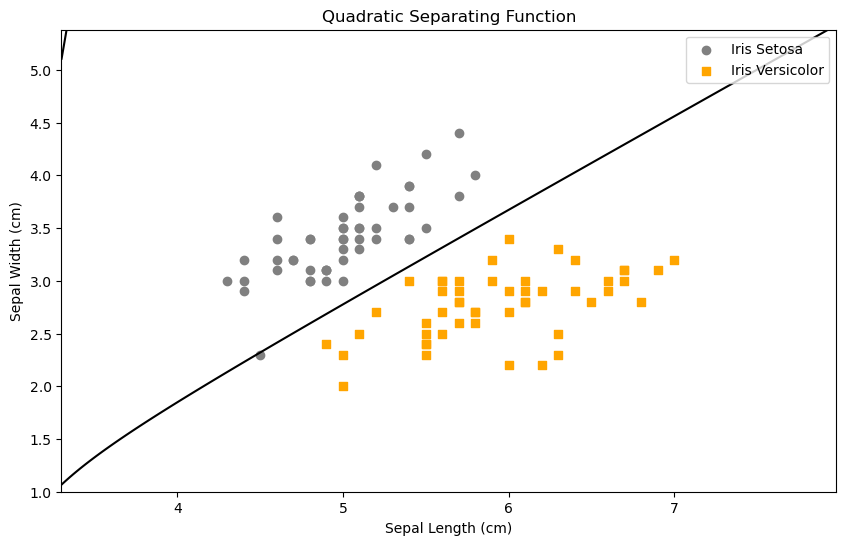

In [42]:

plt.figure(figsize=(10, 6))
plt.contour(xx, yy, Z_setosa, levels=[-np.inf, 0, np.inf], colors='k', linestyles=['--', '-', '--'])
plt.scatter(X[y == 'Iris-setosa'][:, 0], X[y == 'Iris-setosa'][:, 1], c='gray', marker='o', label='Iris Setosa')
plt.scatter(X[y == 'Iris-versicolor'][:, 0], X[y == 'Iris-versicolor'][:, 1], c='orange', marker='s', label='Iris Versicolor')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Quadratic Separating Function')
plt.legend(loc='best')
plt.show()